In [1]:
from pymongo import MongoClient
import pandas as pd

In [2]:
# Connexion à MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["blocksecure_db"]
collection = db["eth_transactions"]

# Récupérer tous les documents
cursor = collection.find()

# Convertir en DataFrame
df = pd.DataFrame(list(cursor))

In [3]:
df.head()

,_id,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,68133f1aeb4263a5bd8632b0,9388,1727,0xcaed34acc1da8ce456a1e217d687bfdcb910b35b,1,0.00,0.00,0.00,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
1,68133f1aeb4263a5bd8632b1,5030,2098,0x84ef59ba858292eafb51cd6d4c42b998ba78ab20,0,5.63,1391.33,305923.50,217,219,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2,68133f1aeb4263a5bd8632b2,1758,1759,0x2e52eb54963ac8e204714248e8185748e7003600,0,0.00,1553.26,226775.50,0,146,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,NaN,DATAcoin
3,68133f1aeb4263a5bd8632b3,8849,1188,0x88eb517c3ce20591aae29e42cc7d4012c8068228,1,0.00,0.00,0.00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68133f1aeb4263a5bd8632b4,3418,486,0x5a2c96e3df0853bd589ddae6b006087b3b6162a3,0,6.08,141.26,77826.12,510,529,...,1.426326,1.426326,1.426326,0.0,0.0,0.0,1.0,1.0,Reputation,Reputation


In [4]:
df = df.drop(columns=['_id'])

In [8]:
!pip install xgboost

     |████████████████████████████████| 4.5 MB 13.1 MB/s eta 0:00:01


In [9]:
pip install seaborn

     |████████████████████████████████| 294 kB 12.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import pickle

In [10]:
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,9388,1727,0xcaed34acc1da8ce456a1e217d687bfdcb910b35b,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
1,5030,2098,0x84ef59ba858292eafb51cd6d4c42b998ba78ab20,0,5.63,1391.33,305923.50,217,219,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2,1758,1759,0x2e52eb54963ac8e204714248e8185748e7003600,0,0.00,1553.26,226775.50,0,146,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,NaN,DATAcoin
3,8849,1188,0x88eb517c3ce20591aae29e42cc7d4012c8068228,1,0.00,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3418,486,0x5a2c96e3df0853bd589ddae6b006087b3b6162a3,0,6.08,141.26,77826.12,510,529,0,...,1.426326,1.426326,1.426326,0.0,0.0,0.0,1.0,1.0,Reputation,Reputation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,5734,2802,0x98db189554a651ae225b91496ec6c58be45ed64a,0,0.00,16197.17,226760.43,0,14,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,NaN,OmiseGO
9797,5191,2259,0x89a788089cd0d98755123126baef7577a2355427,0,0.00,0.00,15369.12,1,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.0,NaN,Livepeer Token
9798,5390,2458,0x8f51d6c3672f0e09fbbafa2ad6ddbdf66ac9972f,0,0.00,0.00,1.77,1,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9799,860,861,0x151f9b0c0d9e4aaedc17feb6d698f96c5e9c75ef,0,165.15,0.00,330.30,2,2,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0


In [6]:
df = df.iloc[:,3:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9801 non-null   int64  
 1   Avg min between sent tnx                              9801 non-null   float64
 2   Avg min between received tnx                          9801 non-null   float64
 3   Time Diff between first and last (Mins)               9801 non-null   float64
 4   Sent tnx                                              9801 non-null   int64  
 5   Received Tnx                                          9801 non-null   int64  
 6   Number of Created Contracts                           9801 non-null   int64  
 7   Unique Received From Addresses                        9801 non-null   int64  
 8   Unique Sent To Addresses                              9801

In [7]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,,Blockwell say NOTSAFU
1,0,0
2,NaN,DATAcoin
3,NaN,NaN
4,Reputation,Reputation
...,...,...
9796,NaN,OmiseGO
9797,NaN,Livepeer Token
9798,0,0
9799,0,0


In [8]:
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9801.000000,9801.000000,9801.000000,9.801000e+03,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,...,8.974000e+03,8.974000e+03,8.974000e+03,8.974000e+03,8.974000e+03,8974.0,8974.0,8974.0,8974.000000,8974.000000
mean,0.221712,5095.892866,8003.777671,2.185410e+05,116.258239,164.300378,3.744720,30.456280,25.925416,43.747490,...,1.257819e+08,4.364576e+06,1.179095e+04,1.309087e+07,6.345126e+06,0.0,0.0,0.0,1.387118,4.832293
std,0.415420,21525.725184,23108.747886,3.231142e+05,758.693959,942.704064,141.733757,299.223072,264.353906,326.317201,...,1.055969e+10,2.145720e+08,1.055795e+06,1.182401e+09,5.927274e+08,0.0,0.0,0.0,6.744969,16.703332
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169500e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.330000,508.740000,4.705150e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,563.130000,5467.900000,3.040970e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.950601e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [11]:
df[numericals].var()

FLAG                                                    1.725734e-01
Avg min between sent tnx                                4.633568e+08
Avg min between received tnx                            5.340142e+08
Time Diff between first and last (Mins)                 1.044028e+11
Sent tnx                                                5.756165e+05
Received Tnx                                            8.886910e+05
Number of Created Contracts                             2.008846e+04
Unique Received From Addresses                          8.953445e+04
Unique Sent To Addresses                                6.988299e+04
min value received                                      1.064829e+05
max value received                                      1.699188e+08
avg val received                                        8.356936e+06
min val sent                                            1.929093e+04
max val sent                                            4.412461e+07
avg val sent                      

FLAG
0    7628
1    2173
Name: count, dtype: int64


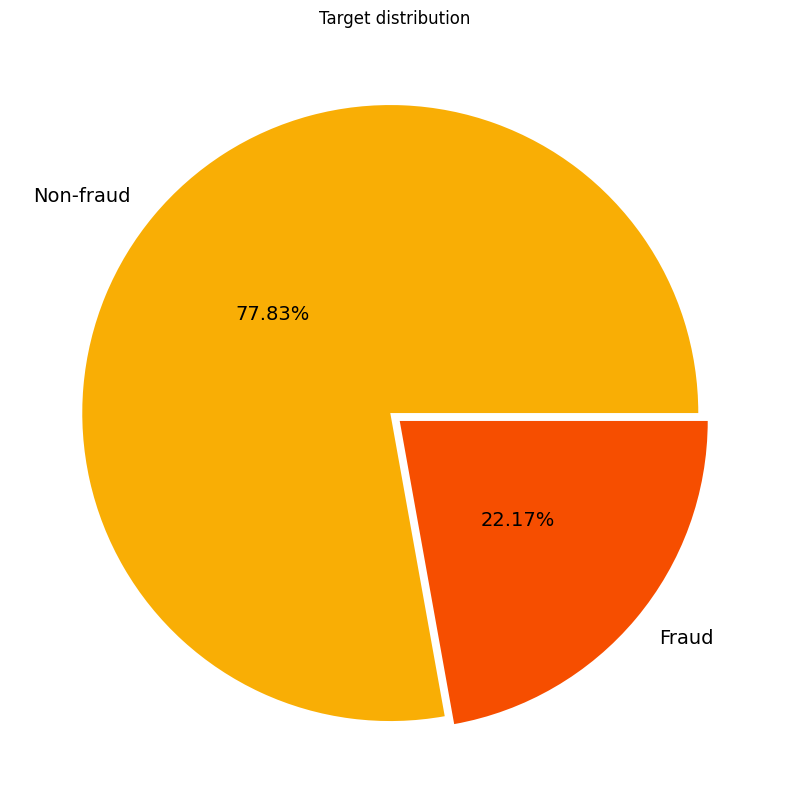

In [9]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae05', '#f64e00']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

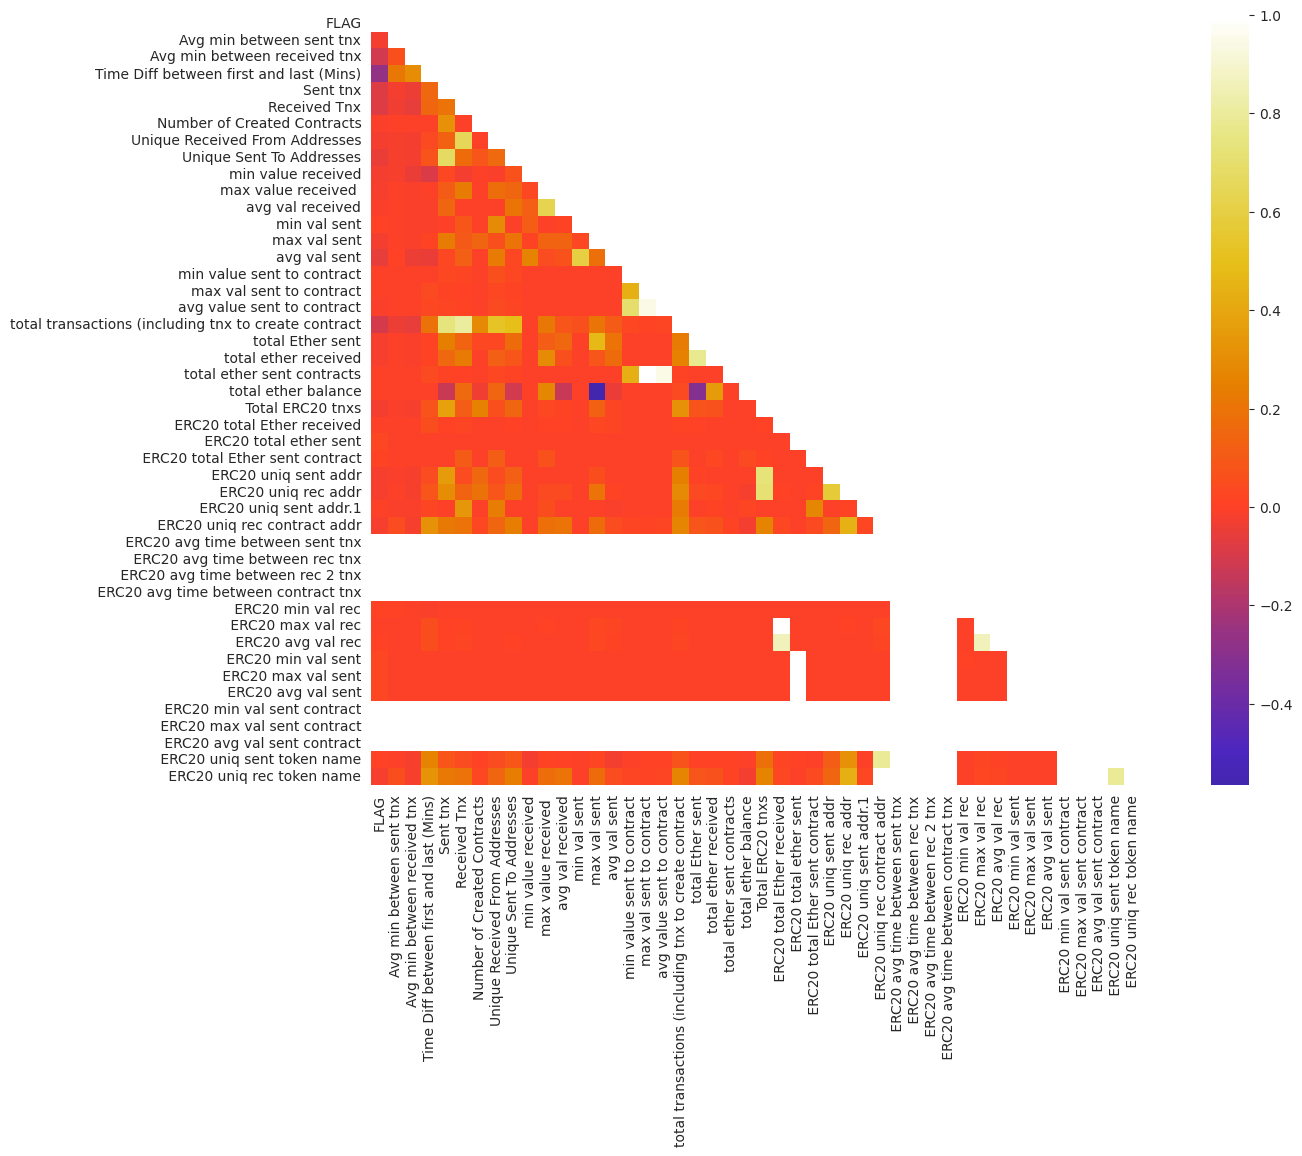

In [10]:
df_cleaned = df.replace('', np.nan)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')
corr = df_cleaned.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr, mask=mask, annot=False, cmap='CMRmap', center=0, square=True)


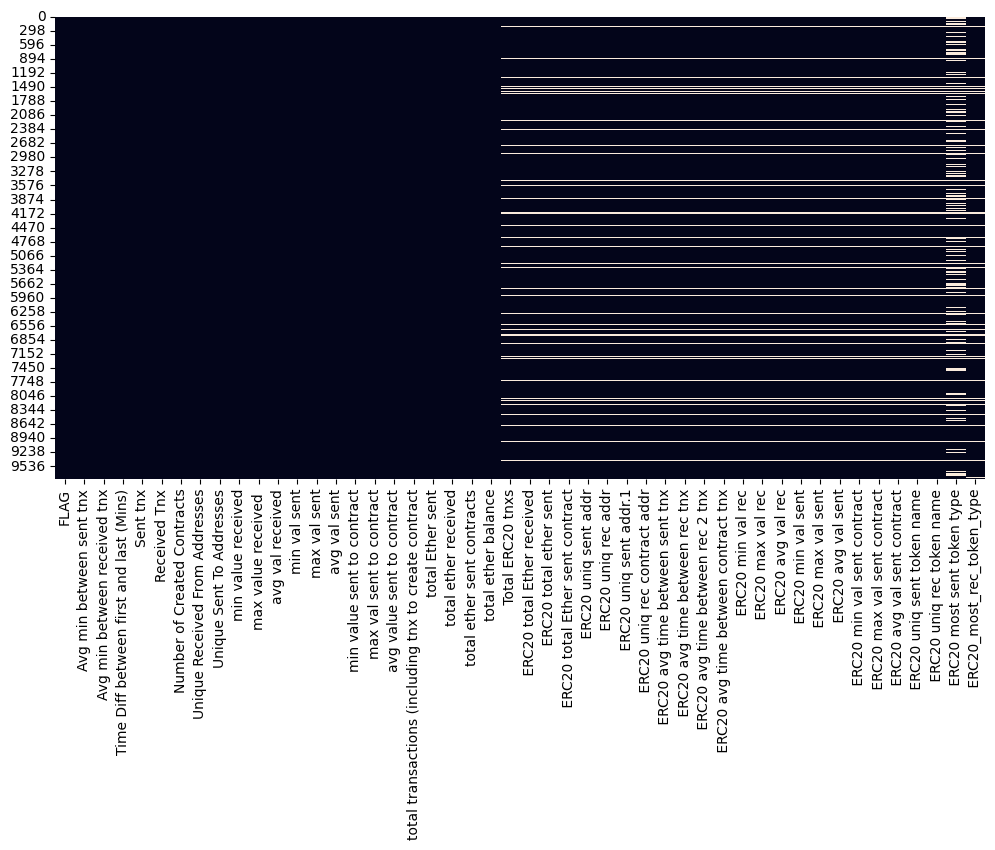

In [14]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()



In [11]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)



In [20]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,...,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
1,0,5.63,1391.33,305923.50,217,219,0,1.004368,0.351440,0.353498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0.00,1553.26,226775.50,0,146,1,1.646992,0.625732,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,DATAcoin
3,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,6.08,141.26,77826.12,510,529,0,9.999791,2.806656,2.910413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Reputation,Reputation


In [12]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 avg time between sent tnx',
       ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'],
      dtype='object')

In [13]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()



(9801, 26)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,...,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
1,0,5.63,1391.33,305923.50,217,219,0,1.004368,0.351440,0.353498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0.00,1553.26,226775.50,0,146,1,1.646992,0.625732,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,DATAcoin
3,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,6.08,141.26,77826.12,510,529,0,9.999791,2.806656,2.910413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Reputation,Reputation


In [14]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'total Ether sent',
       'total ether balance', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 avg time between sent tnx',
       ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'],
      dtype='object')

In [15]:
drops = [' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract', ' ERC20 most sent token type', ' ERC20_most_rec_token_type']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9801, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,13.370000,0.000000,0.0,0.0,1.0
1,0,5.63,1391.33,305923.50,217,219,0,1.004368,0.351440,0.353498,76.708962,0.256362,0.000000,0.000000,0.0,0.0,0.0
2,0,0.00,1553.26,226775.50,0,146,1,1.646992,0.625732,0.000000,0.000000,91.356900,1.934497,0.000000,0.0,0.0,2.0
3,1,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,0,6.08,141.26,77826.12,510,529,0,9.999791,2.806656,2.910413,1484.310606,0.410166,1.426326,1.426326,0.0,1.0,1.0


In [ ]:
df[' ERC20 total Ether sent contract'] = df[' ERC20 total Ether sent contract'].fillna(0)

In [33]:
df['Time Diff between first and last (Mins)'].isna().sum()

0

In [34]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9801, 16) (9801,)


In [35]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7840, 16) (7840,)
(1961, 16) (1961,)


In [36]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [37]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-1.103178,0.507751,0.884468,-1.398546,1.568633,2.509861,-0.920955,-1.008662,-1.141048,-1.255438,-0.004192,0.439913,-0.410113,-0.032044,-0.437833,1.213373
1,0.311353,0.759929,1.103995,1.649991,1.460674,-0.398415,0.522180,-0.302432,-0.196168,1.059537,-0.004434,-0.741290,-0.410113,-0.032044,-0.437833,-0.869879
2,-1.103178,-1.184500,-1.643275,-1.398546,-1.791305,-0.398415,-1.414668,-1.287085,-1.141048,-1.255438,-0.004434,-0.741290,-0.410113,-0.032044,-0.437833,-0.869879
3,-1.103178,-1.184500,-1.643275,-1.398546,-1.791305,-0.398415,-1.414668,-1.287085,-1.141048,-1.255438,-0.004434,-0.741290,-0.410113,-0.032044,-0.437833,-0.869879
4,-1.103178,-1.184500,-0.256199,-0.599111,-1.007277,-0.398415,-0.881361,-0.541140,-0.434298,-0.867024,-0.004434,-0.147032,-0.410113,-0.032044,-0.437833,0.373084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,0.087608,-1.184500,-1.156569,0.025218,-1.007277,-0.398415,1.095303,1.447316,1.207246,0.781193,-0.004434,-0.741290,-0.410113,-0.032044,-0.437833,-0.869879
7836,0.220650,0.437676,1.341883,1.924780,1.838231,-0.398415,0.590306,-0.313515,-0.153070,1.515626,-0.004431,1.721354,2.395637,-0.032044,2.103968,1.315908
7837,-1.103178,-0.167126,-0.951202,-1.398546,-0.371561,-0.398415,-0.892989,-0.726136,-1.141048,-1.255438,-0.004427,1.230266,-0.410113,-0.032044,-0.437833,0.825511
7838,-1.103178,-1.184500,-1.521803,-0.599111,-1.007277,-0.398415,-0.935907,-0.613465,-0.503372,-0.907657,-0.004434,-0.741290,-0.410113,-0.032044,-0.437833,-0.869879


In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7840, 16), (7840,))
Shape of the training after SMOTE: ((12248, 16), (12248,))


In [39]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6124 
 	Fauds: 1716
AFTER OVERSAMPLING 
 	Non-frauds: 6124 
 	Fauds: 6125


In [40]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
norm_test_f = norm.transform(X_test)

preds = LR.predict(norm_test_f)


In [41]:
print(y_test.shape)
y_test.value_counts()

(1961,)


FLAG
0    1504
1     457
Name: count, dtype: int64

In [ ]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1504
           1       0.60      0.84      0.70       457

    accuracy                           0.83      1961
   macro avg       0.77      0.83      0.79      1961
weighted avg       0.86      0.83      0.84      1961

[[1249  255]
 [  74  383]]


Random Forest

In [43]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(norm_test_f)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1504
           1       0.89      0.89      0.89       457

    accuracy                           0.95      1961
   macro avg       0.93      0.93      0.93      1961
weighted avg       0.95      0.95      0.95      1961

[[1455   49]
 [  48  409]]


XGB Classifier

In [47]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(norm_test_f)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1504
           1       0.89      0.91      0.90       457

    accuracy                           0.95      1961
   macro avg       0.93      0.94      0.94      1961
weighted avg       0.95      0.95      0.95      1961

[[1451   53]
 [  39  418]]


95% d'accuracy

Xgboost c'est bcp meilleur


Hyperparameters tuning for XGB Classifier

In [45]:


params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              'n_estimators':[100,200],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[2,3,4],
               'colsample_bytree':[0.3,0.5,0.7]}

grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')



Best params found for XGBoost are: {'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
Best recall obtained by the best params: 0.9717442877096459


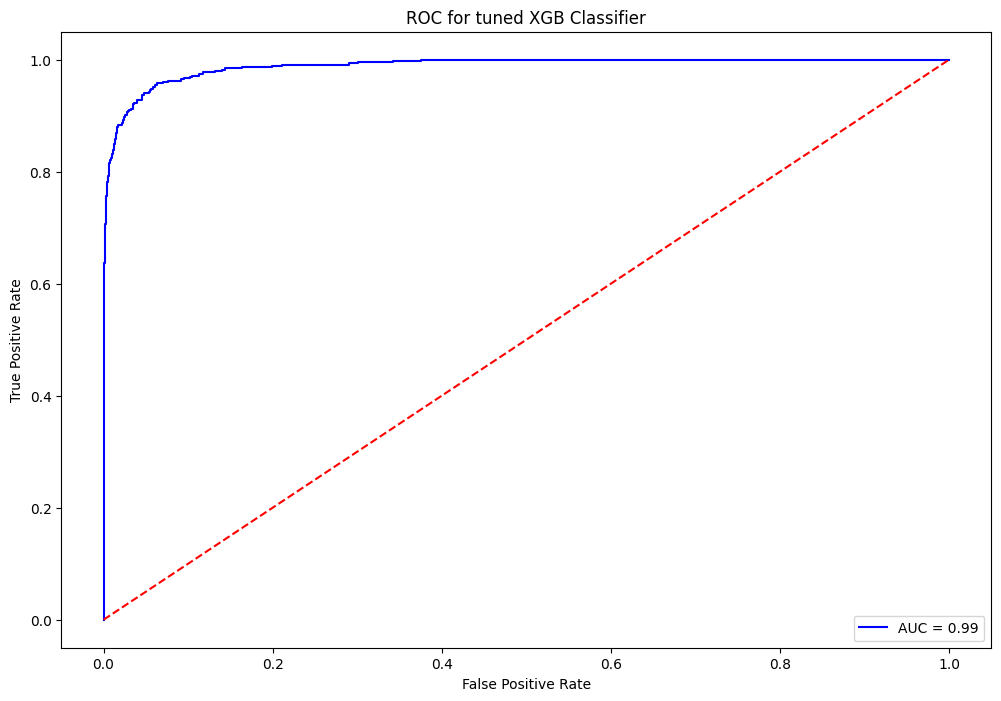

In [48]:


# Plotting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [49]:


# Save the model for further use
pickle_out = open('XGB_FRAUD.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()

